In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import collections
import numpy as np

## Technical Modus Operandi

1. Filter down all tweets to only those regionalized in America, and in English
2. Split the tweets into three categories: Retweets, Quotes, and new content
For each of these 3 categories:
A)
    I. Plot frequency of tweets over time (how many were posted over time) to look for local activity spikes
    II. For each spike, first relate them to major [global] events
    III. Plot account_type, account_category over time during the spike time
    IV. Plot word frequency for each account_type to see what topic they were trying to promote
B) Correlation between word_frequency and content length per year

In [12]:
import glob
file_paths = glob.glob('./data/*')
tweet_type_per_file={}
frames = []
for i, p in enumerate(file_paths):
    if i > 5:
        break
    tweets = pd.read_csv(p)
    frames.append(tweets)
big_frame = pd.concat(frames)

In [145]:
tweets = big_frame

In [146]:
english_tweets = tweets[(tweets['language']=='English') & (tweets['region']=="United States")]

In [148]:
def clean_data(tweets):
    tweets['content'] = tweets['content'].str.lower()

In [149]:
clean_data(english_tweets)

/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
def word_freq(tweets):
    content_loc= tweets.columns.get_loc("content")
    words = []
    for i in range(len(tweets)):
        c = tweets.iloc[i, content_loc]
        if isinstance(c, str):
            words.append(c.lower().split(" "))
    words = list(itertools.chain(*words))
    counts= collections.Counter(words)
    return counts

In [115]:
filler_words = [
    '',
    'to',
    'in',
    'the',
    'of',
    'for',
    'a','on','and','is','at','with','after','you','from','as','i',
    'by','be','says','are','this','that','not','over','it','will',
    'who','was','about','have','up','we','more','but','just','rt']

In [150]:
counter = word_freq(
    english_tweets
)
for w in filler_words:
    del counter[w]
top = counter.most_common(10)
print(top)



[('#news', 84084), ('#sports', 33094), ('trump', 31177), ('my', 29647), ('#world', 27208), ('new', 26752), ('your', 25965), ('-', 24786), ('police', 23088), ('man', 20341)]


In [171]:
english_tweets[english_tweets['updates'] > 40000].iloc[0]

external_author_id                                               1679279490
author                                                        AMELIEBALDWIN
content                   love watching my amazing wife @laraleatrump on...
region                                                        United States
language                                                            English
publish_date                                                 5/5/2017 17:12
harvested_date                                               5/5/2017 17:12
following                                                              2284
followers                                                              2860
updates                                                               40003
post_type                                                               NaN
account_type                                                          Right
retweet                                                                   0
account_cate

In [168]:
len("crazy! a 14 yr old child who can't pay a small fine to a court can end up in an adult prison instead. #finesandfees ")

116

In [177]:
subset = english_tweets[(english_tweets['content'].str.contains(top[0][0])) & (english_tweets['tweet_length']<=140)]

In [186]:
subset['tweet_length'].value_counts().index.unique()

Int64Index([71, 75, 72, 67, 74, 73, 77, 76, 70, 66,
            ...
            17, 21, 19, 23, 11, 22, 12, 16,  5, 15],
           dtype='int64', length=129)

/home/glacierpika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


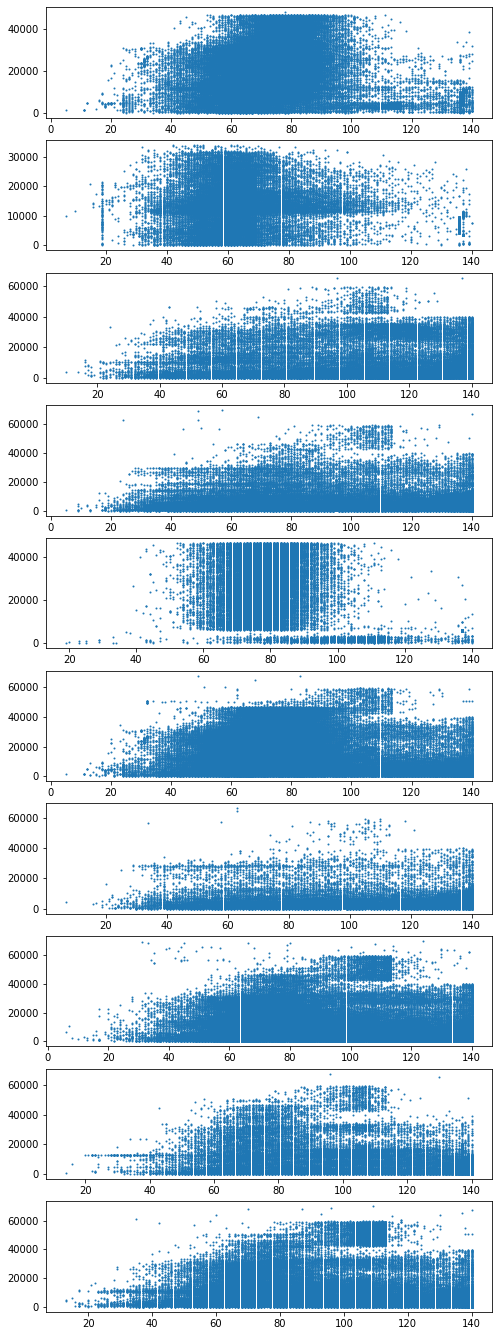

In [176]:
english_tweets['tweet_length'] = english_tweets['content'].str.len()
fig, ax = plt.subplots(10,1,figsize=(8, 24))
for i,w in enumerate(top):
    subset = english_tweets[(english_tweets['content'].str.contains(w[0])) & (english_tweets['tweet_length']<=140)]
    ax[i].scatter(subset['tweet_length'], subset['updates'], s=1)


In [126]:
def plot_word_freq_by_word(tweets, word_count=10):
    counter = word_freq(
                tweets
            )
    for w in filler_words:
        del counter[w]
    freqs = counter.most_common(word_count)
    
    for w in freqs:
        w = w[0]
        col_name = '{}_count'.format(w)
        print(w)
        tweets[col_name] = tweets.apply(lambda x: 1 if x['content'].find(w) >= 0 else 0, axis=1)
        tweets[[col_name]].resample('M').sum().plot()  

In [122]:
for w in counter


Counter({'i': 16449,
         'hurt': 958,
         'easy,': 19,
         'just': 7964,
         "don't": 4295,
         'show': 2529,
         'it.': 885,
         'you': 18431,
         'can': 5678,
         'someone': 980,
         'and': 35754,
         'not': 12415,
         'even': 1879,
         'know': 3198,
         "who's": 336,
         'got': 2093,
         'the': 78716,
         'worst': 751,
         'make': 4286,
         'up': 8539,
         'ever,': 29,
         'tell': 1021,
         'me,': 234,
         'mirror': 66,
         'jade': 16,
         'doesn`t': 28,
         'love': 2568,
         'her!': 66,
         'https://t.co/feosikho7c': 1,
         'unreal': 10,
         'friendship': 67,
         'may': 3921,
         'turn': 740,
         'to': 125863,
         'real.': 46,
         'but': 8040,
         'real': 1598,
         'friendship,': 7,
         'once': 605,
         'ended,': 6,
         'cannot': 348,
         'be': 14754,
         'mended.': 2,
      

#news
#sports
#world
police
#local
new
trump
#politics
man
#topnews


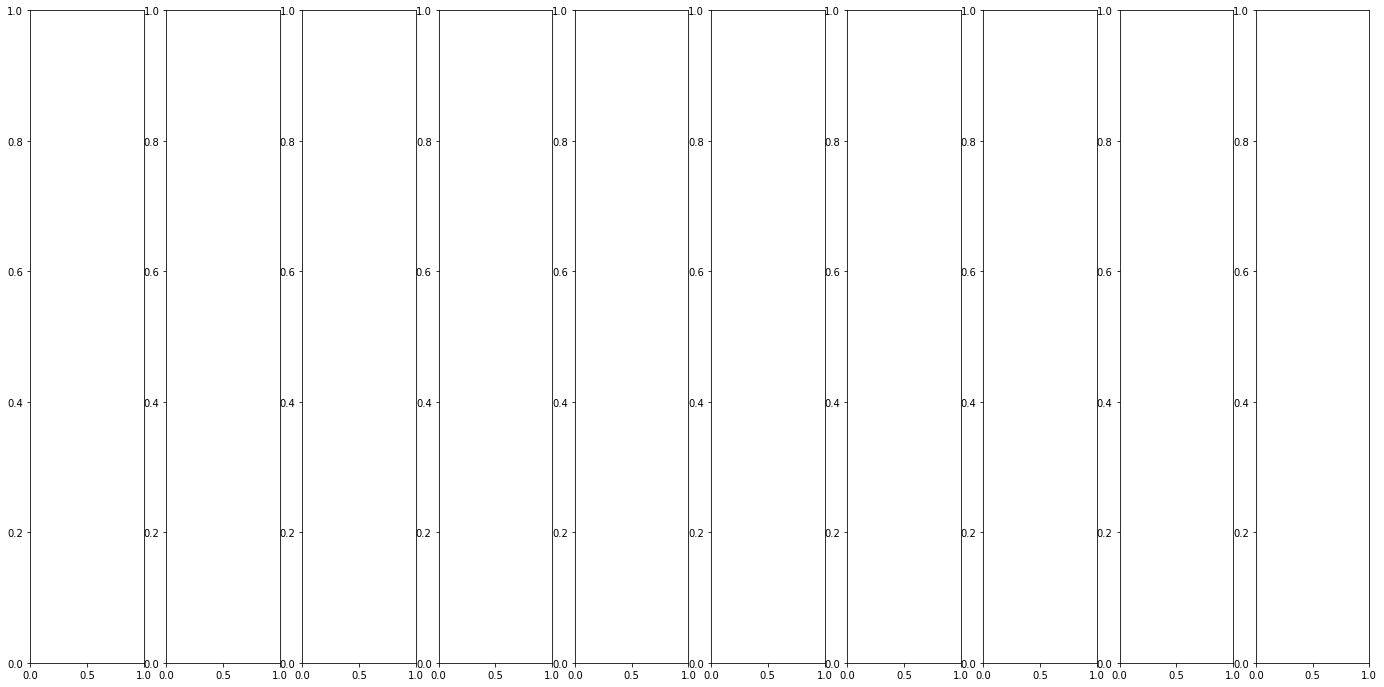

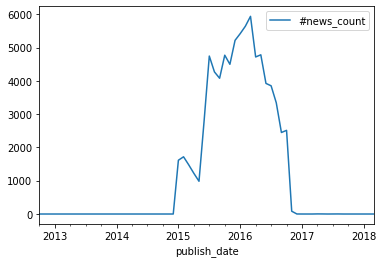

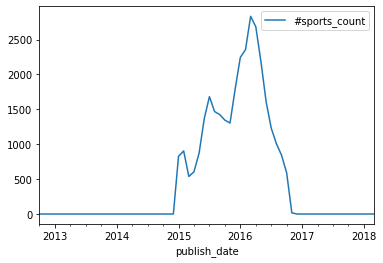

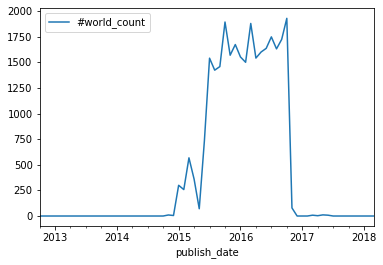

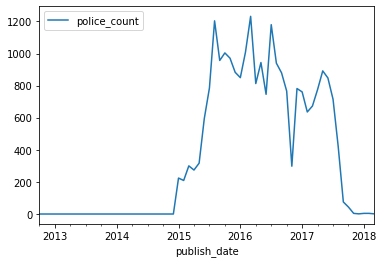

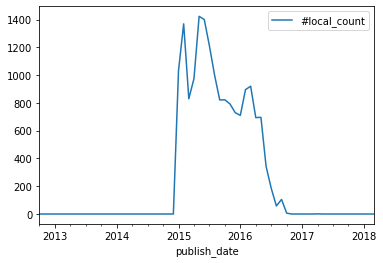

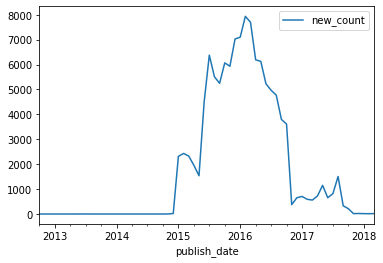

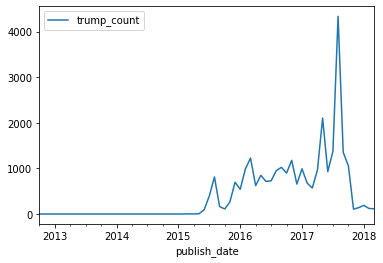

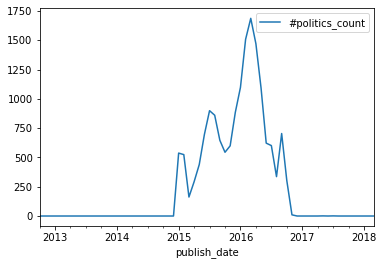

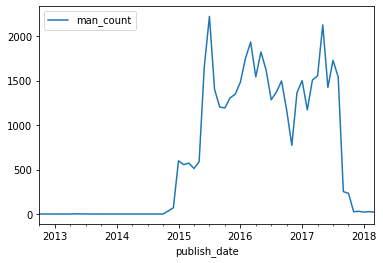

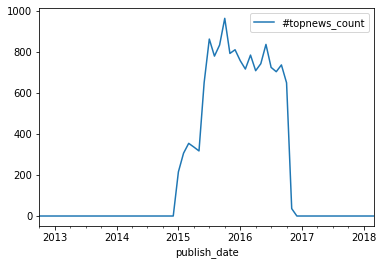

In [127]:
plot_word_freq_by_word(english_tweets_new_content)

In [136]:
def plot_account(tweets):
    tweets['Right_count'] = tweets.apply(lambda x: 1 if x['account_type'] == 'Right' else 0, axis=1)
    tweets['Left_count'] = tweets.apply(lambda x: 1 if x['account_type'] == 'Left' else 0, axis=1)
    tweets['RightTroll_count'] = tweets.apply(lambda x: 1 if x['account_category'] == 'RightTroll' else 0, axis=1)
    tweets['LeftTroll_count'] = tweets.apply(lambda x: 1 if x['account_category'] == 'LeftTroll' else 0, axis=1)
    tweets[['Right_count']].resample('M').sum().plot()  
    tweets[['Left_count']].resample('M').sum().plot()
    tweets[['RightTroll_count']].resample('M').sum().plot()
    tweets[['LeftTroll_count']].resample('M').sum().plot()


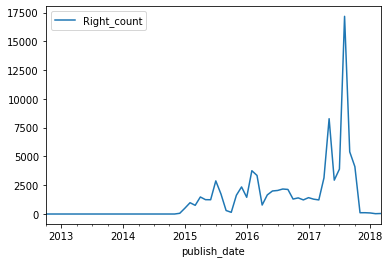

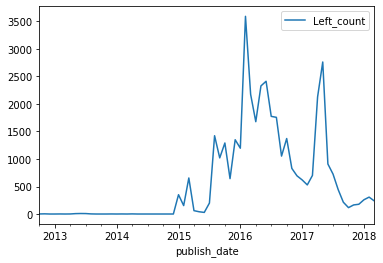

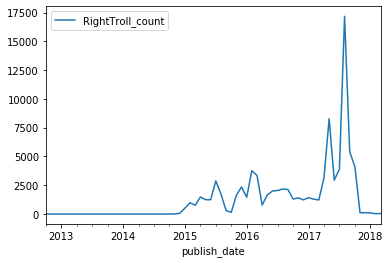

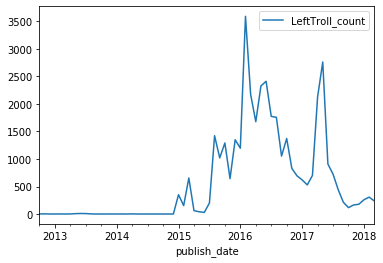

In [137]:
plot_account(english_tweets_new_content)

In [133]:
english_tweets_new_content['account_type'].unique()


array(['Koch', 'Right', 'Left', '?', 'Hashtager', 'Commercial', 'Russian',
       'local', 'news', 'German', 'Ebola ', 'ZAPOROSHIA'], dtype=object)

In [132]:
english_tweets_new_content['account_category'].unique()

array(['Fearmonger', 'RightTroll', 'LeftTroll', 'Unknown', 'HashtagGamer',
       'Commercial', 'NonEnglish', 'NewsFeed'], dtype=object)